# 오전

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.datasets import mnist
from keras.datasets import fashion_mnist

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
# 모델 생성, 마스크 갯수 32, 마스크 사이즈 3 ** 2
# 입력 데이터의 사이즈 28 * 28 * 1 -> 1은 흑백
model = Sequential()
model.add(layers.Conv2D(32, kernel_size = 3, activation = "relu",
                       padding = "same", input_shape = (28, 28, 1)))

In [ ]:
# 맥스 풀링 2 * 2
model.add(layers.MaxPooling2D(2))

In [ ]:
model.add(layers.Conv2D(64, kernel_size = (3, 3), activation = "relu",
                       padding = "same"))
model.add(layers.MaxPool2D(2))

In [ ]:
model.add(layers.Flatten()) # 차원 줄이기
model.add(layers.Dense(100, activation = "relu")) # 모델
model.add(layers.Dropout(0.4))
model.add(layers.Dense(10, activation = "softmax"))

In [ ]:
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", 
              metrics = ["ACC"])

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-cnn-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2,
                                                 restore_best_weights = True)

In [ ]:
history = model.fit(train_scaled, train_target, epochs = 20, 
                    validation_data = (val_scaled, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

### CNN 구현

In [ ]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32") / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32") / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [ ]:
X_train.shape

In [ ]:
# CNN
model = Sequential()
model.add(layers.Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1), padding = "valid",
                       activation = "relu"))
model.add(layers.Conv2D(32, kernel_size = (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D(pool_size = 2))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = "softmax"))

In [ ]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", 
              metrics= ["ACC"])

In [ ]:
model.summary()

In [ ]:
model.fit(X_train, Y_train, epochs = 20, validation_data = (X_test, Y_test))

# 오후

In [28]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [29]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [30]:
X_train, X_val, Y_train, Y_val = train_test_split(X_test, Y_test, 
                                                    test_size = 0.3, shuffle = False)

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, 
                                                    test_size = 0.1, shuffle = False)

In [33]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(6300, 28, 28) (3000, 28, 28) (700, 28, 28) (6300,) (3000,) (700,)


In [34]:
Y_train = np_utils.to_categorical(Y_train, 10)
Y_val = np_utils.to_categorical(Y_val, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [35]:
model = Sequential()
model.add(layers.Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1), padding = "valid",
                       activation = "relu"))
model.add(layers.Conv2D(32, kernel_size = (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D(pool_size = 2))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = "softmax"))

In [39]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", 
              metrics= ["ACC"])

In [40]:
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping

model_dir = "./20211206CNN"
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

modelpath = "./" + model_dir + "/{epoch:02d}-{val_loss:.4f}.hdf5"

checkpointer = ModelCheckpoint(filepath = modelpath, monitor = "val_loss",
                             verbose = 0, save_best_only = True)

early_stopping_callback = EarlyStopping(patience = 3)

In [42]:
history = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs = 200,
         batch_size = 200, verbose = 1, callbacks = [checkpointer, early_stopping_callback])

Epoch 1/200
32/32 [==============================] - 4s 125ms/step - loss: 0.4232 - ACC: 0.8637 - val_loss: 0.1599 - val_ACC: 0.9527
Epoch 2/200
32/32 [==============================] - 4s 125ms/step - loss: 0.3204 - ACC: 0.8952 - val_loss: 0.1341 - val_ACC: 0.9617
Epoch 3/200
32/32 [==============================] - 4s 127ms/step - loss: 0.2424 - ACC: 0.9186 - val_loss: 0.1113 - val_ACC: 0.9657
Epoch 4/200
32/32 [==============================] - 4s 129ms/step - loss: 0.2032 - ACC: 0.9317 - val_loss: 0.1007 - val_ACC: 0.9680
Epoch 5/200
32/32 [==============================] - 4s 129ms/step - loss: 0.1647 - ACC: 0.9471 - val_loss: 0.0978 - val_ACC: 0.9697
Epoch 6/200
32/32 [==============================] - 4s 138ms/step - loss: 0.1414 - ACC: 0.9530 - val_loss: 0.0786 - val_ACC: 0.9717
Epoch 7/200
32/32 [==============================] - 4s 139ms/step - loss: 0.1172 - ACC: 0.9583 - val_loss: 0.0920 - val_ACC: 0.9720
Epoch 8/200
32/32 [==============================] - 5s 158ms/step - 

In [91]:
y_vloss = history.history["val_loss"]
y_loss = history.history["loss"]

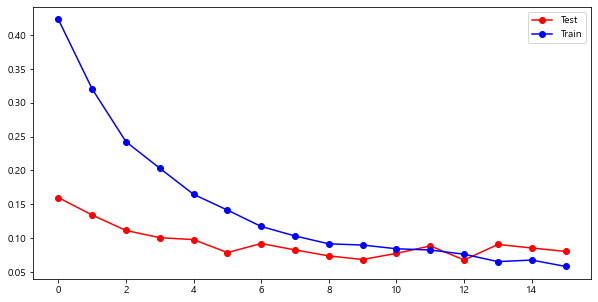

In [122]:
plt.figure(figsize = (10, 5))
plt.plot(y_vloss, marker = "o", c = "red", label = "Test")
plt.plot(y_loss, marker = "o", c = "blue", label = "Train")
plt.legend(loc = "best")
plt.show()

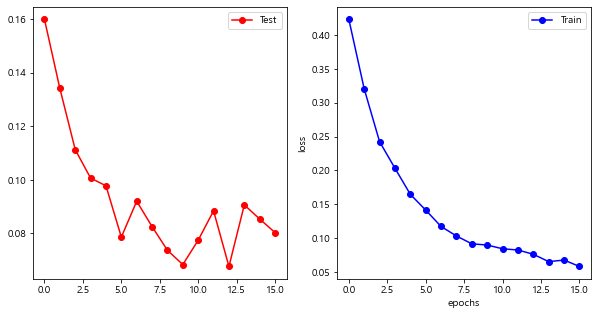

In [111]:
x_len = np.arange(len(y_loss))

fig = plt.figure(figsize = (10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(y_vloss, marker = "o", c = "red", label = "Test")
ax2.plot(y_loss, marker = "o", c = "blue", label = "Train")

ax1.legend(loc = "best")
ax2.legend(loc = "best")

plt.xlabel("epochs")
plt.ylabel("loss")

plt.show()

In [114]:
test_model = keras.models.load_model("./20211206CNN/13-0.0677.hdf5")
X_test = X_test.astype("float32") / 255

In [118]:
X_test.shape

(700, 28, 28)

In [117]:
Y_test.shape

(700, 10)

In [119]:
test_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                        

In [120]:
test_model.evaluate(X_test.reshape(-1, 28, 28, 1), Y_test) # 테스트 데이터로 결과 확인

22/22 [==============================] - 1s 7ms/step - loss: 2.2522 - ACC: 0.2829


[2.252216339111328, 0.28285714983940125]

### 자연어처리

In [126]:
from keras.preprocessing.text import text_to_word_sequence, Tokenizer

In [127]:
text = "해보지 않으면 해낼 수 없다."

In [128]:
# tokenization 결과, 단어로 쪼갠 결과 반환, 리스트로
result = text_to_word_sequence(text)
result

['해보지', '않으면', '해낼', '수', '없다']

In [130]:
# 단어를 빈도 순으로 정리
# 토큰화 함수에 적용 후 단어의 빈도 수 출력
docs = ['먼저 텍스트의 각 단어를 나누어 토큰화 합니다.',
       '텍스트의 단어로 토큰화 해야 딥러닝에서 인식됩니다.',
       '토큰화 한 결과는 딥러닝에서 사용 할 수 있습니다.'
       ]

In [142]:
token = Tokenizer()
token.fit_on_texts(docs)
token.word_counts

OrderedDict([('먼저', 1),
             ('텍스트의', 2),
             ('각', 1),
             ('단어를', 1),
             ('나누어', 1),
             ('토큰화', 3),
             ('합니다', 1),
             ('단어로', 1),
             ('해야', 1),
             ('딥러닝에서', 2),
             ('인식됩니다', 1),
             ('한', 1),
             ('결과는', 1),
             ('사용', 1),
             ('할', 1),
             ('수', 1),
             ('있습니다', 1)])

In [133]:
type(token.word_counts)

collections.OrderedDict

In [135]:
print("문장 :", token.document_count)

문장 : 3


In [136]:
print("각 단어의 수 :", token.word_counts)

각 단어의 수 : OrderedDict([('먼저', 1), ('텍스트의', 2), ('각', 1), ('단어를', 1), ('나누어', 1), ('토큰화', 3), ('합니다', 1), ('단어로', 1), ('해야', 1), ('딥러닝에서', 2), ('인식됩니다', 1), ('한', 1), ('결과는', 1), ('사용', 1), ('할', 1), ('수', 1), ('있습니다', 1)])


In [137]:
print("각 단어에 매겨진 인덱스 :", token.word_index)

각 단어에 매겨진 인덱스 : {'토큰화': 1, '텍스트의': 2, '딥러닝에서': 3, '먼저': 4, '각': 5, '단어를': 6, '나누어': 7, '합니다': 8, '단어로': 9, '해야': 10, '인식됩니다': 11, '한': 12, '결과는': 13, '사용': 14, '할': 15, '수': 16, '있습니다': 17}


In [146]:
# 텍스트 리뷰로 부정과 긍정을 도출

In [147]:
docs = ["너무 재밌네요","최고예요","참 잘 만든 영화예요",
        "추천하고 싶은 영화입니다","한번 더 보고싶네요","글쎄요",
        "별로예요","생각보다 지루하네요","연기가 어색해요","재미없어요"]

In [151]:
target = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [158]:
# 토큰화
token = Tokenizer()
token.fit_on_texts(docs)

In [165]:
from keras.preprocessing.sequence import pad_sequences
# embedding : 데이터를 4로 길이를 맞춤
x = token.texts_to_sequences(docs) # 각 문장마다 단어의 갯수로 분리함
padded_x = pad_sequences(x, 4) # maximum 4로
padded_x

array([[ 0,  0,  1,  2],
       [ 0,  0,  0,  3],
       [ 4,  5,  6,  7],
       [ 0,  8,  9, 10],
       [ 0, 11, 12, 13],
       [ 0,  0,  0, 14],
       [ 0,  0,  0, 15],
       [ 0,  0, 16, 17],
       [ 0,  0, 18, 19],
       [ 0,  0,  0, 20]])

In [166]:
x

[[1, 2],
 [3],
 [4, 5, 6, 7],
 [8, 9, 10],
 [11, 12, 13],
 [14],
 [15],
 [16, 17],
 [18, 19],
 [20]]

In [176]:
model = Sequential()
model.add(layers.Embedding(len(token.index_word) + 1, 8, input_length = 4))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation = "sigmoid"))
model.compile(loss = "BCE", optimizer = "adam", metrics = "ACC")
model.fit(padded_x, target, epochs = 15)

Epoch 1/15
1/1 [==============================] - 0s 372ms/step - loss: 0.6998 - ACC: 0.1000
Epoch 2/15
1/1 [==============================] - 0s 4ms/step - loss: 0.6976 - ACC: 0.2000
Epoch 3/15
1/1 [==============================] - 0s 3ms/step - loss: 0.6954 - ACC: 0.4000
Epoch 4/15
1/1 [==============================] - 0s 4ms/step - loss: 0.6932 - ACC: 0.6000
Epoch 5/15
1/1 [==============================] - 0s 2ms/step - loss: 0.6911 - ACC: 0.7000
Epoch 6/15
1/1 [==============================] - 0s 4ms/step - loss: 0.6889 - ACC: 0.7000
Epoch 7/15
1/1 [==============================] - 0s 3ms/step - loss: 0.6868 - ACC: 0.8000
Epoch 8/15
1/1 [==============================] - 0s 4ms/step - loss: 0.6846 - ACC: 0.8000
Epoch 9/15
1/1 [==============================] - 0s 4ms/step - loss: 0.6825 - ACC: 0.9000
Epoch 10/15
1/1 [==============================] - 0s 3ms/step - loss: 0.6804 - ACC: 0.9000
Epoch 11/15
1/1 [==============================] - 0s 4ms/step - loss: 0.6783 - ACC: 0.

In [178]:
print("\n ACC : %.4f" % model.evaluate(padded_x, target)[1])

1/1 [==============================] - 0s 22ms/step - loss: 0.6676 - ACC: 0.9000

 ACC : 0.9000
